In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

from IPython.display import FileLink
import pickle
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from skimage.filters import gabor, sobel, rank
from skimage.feature import hog, local_binary_pattern, ORB, canny
from sklearn.decomposition import PCA
from skimage import io
from skimage.morphology import disk
from sklearn.preprocessing import StandardScaler


import cv2 as cv
import os
import matplotlib.pyplot as plt
print('hello')


hello


In [410]:
cv2_base_dir = os.path.dirname(os.path.abspath(cv.__file__))
haar_model = os.path.join(
    cv2_base_dir, 'data/haarcascade_frontalface_default.xml')
haar_data = cv.CascadeClassifier(haar_model)


In [2]:
def kmeans(img):
    Z = img.reshape(-1)
    Z = np.float32(Z)
    criteria = (cv.TERM_CRITERIA_EPS +
                cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    K = 8
    ret, label, center = cv.kmeans(
        Z, K, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    res = center[label.flatten()]
    res2 = res.reshape((img.shape))
    return res2


In [3]:
nomask_faces = []
for dirname, _, filenames in os.walk('H:\Programming\PCD_maskdetection\dataset\without_mask'):
    for filename in filenames:
        img = cv.imread(os.path.join(dirname, filename))
        img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        face = cv.resize(img, (50, 50))
        nomask_faces.append(face)


In [5]:
mask_faces = []
for dirname, _, filenames in os.walk('H:\Programming\PCD_maskdetection\dataset\with_mask'):
    for filename in filenames:
        img = cv.imread(os.path.join(dirname, filename))
        img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        face = cv.resize(img, (50, 50))
        mask_faces.append(face)


In [6]:
nomask_hist = []
for face in nomask_faces:
    face = rank.mean_bilateral(
        face, footprint=disk(2), s0=50, s1=50
    )
    face = kmeans(face)
    fd = hog(face, orientations=9, pixels_per_cell=(8, 8),
             cells_per_block=(2, 2))

    nomask_hist.append(fd)


In [7]:
mask_hist = []
for face in mask_faces:
    face = rank.mean_bilateral(
            face, footprint=disk(2), s0=50, s1=50
    )
    face = kmeans(face)
    fd = hog(face, orientations=9, pixels_per_cell=(8, 8),
                 cells_per_block=(2, 2))

        #edge = sobel(face)
    mask_hist.append(fd)


In [9]:


np_nomask = np.array(nomask_hist)
print(np_nomask.shape)


(1930, 900)


In [10]:
np_mask = np.array(mask_hist)
print(np_mask.shape)


(1932, 900)


In [11]:
print(np_mask.shape)

X = np.r_[np_mask, np_nomask]
labels = np.zeros(X.shape[0])

labels[np_mask.shape[0]:] = 1.0
print(labels[111])

names = {0: 'Mask', 1: 'Without Mask'}
print(X.shape)


(1932, 900)
0.0
(3862, 900)


In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, labels, test_size=0.25)
print(x_train)


[[0.11963515 0.         0.08459483 ... 0.         0.         0.        ]
 [0.09708408 0.         0.13729763 ... 0.06010627 0.10061153 0.12855669]
 [0.         0.         0.         ... 0.19163361 0.22195869 0.09438599]
 ...
 [0.36774918 0.         0.09918245 ... 0.         0.         0.        ]
 [0.15475925 0.         0.31671197 ... 0.41460814 0.18049086 0.        ]
 [0.16723964 0.05857299 0.12048753 ... 0.29086984 0.         0.        ]]


In [19]:
svm = SVC(C=1, break_ties=False, cache_size=200, class_weight='balanced',
          coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
          kernel='rbf', max_iter=-1, probability=False, random_state=None,
          shrinking=True, tol=0.001, verbose=False)
svm.fit(x_train, y_train)


SVC(C=1, class_weight='balanced')

In [20]:

y_pred = svm.predict(x_test)
print('svm', accuracy_score(y_test, y_pred))


svm 0.9285714285714286


In [521]:
print(y_pred)


[1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0.
 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1.
 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0.
 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1.
 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1.
 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0.
 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1.

In [27]:
filename = 'model16.sav'
os.chdir('H:\Programming\PCD_maskdetection')

pickle.dump(svm, open(filename, 'wb'))


(1, 900)
Mask


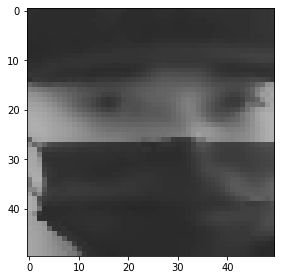

In [26]:
filename = "dataset/with_mask/0_0_5 copy 18.jpg"
img = cv.imread(filename)
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
face = cv.resize(img, (50, 50))
face = rank.mean_bilateral(
    face, footprint=disk(2), s0=50, s1=50
)
fd = hog(face, orientations=9, pixels_per_cell=(8, 8),
         cells_per_block=(2, 2))
fd = fd.reshape(1, -1)
io.imshow(face)
print(fd.shape)
print(names[int(svm.predict(fd))])
